# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = The change in response rate to the new email template is 0%.
# (the probability of success for the new email template is 0.05)

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = The change in response rate to the new email template is not 0% 
# (the probability of success for the new email template != 0.05)

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [2]:
from statsmodels.stats.power import TTestIndPower, TTestPower
power_analysis = TTestIndPower()

In [6]:
# Calculate the required sample size

mean_diff = 0.01
sd = 0.0475
effect_size = mean_diff / sd # standardize effect size based on std dev

print(power_analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8))
# the more conservative two-tailed approach (default) estimates n=355 is needed
power_analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
# the less conservative one-tailed approach that assumes the new template will perform better 
#   (and not worse) estimates n=280 is needed

355.1427544342681


279.6667468021971

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

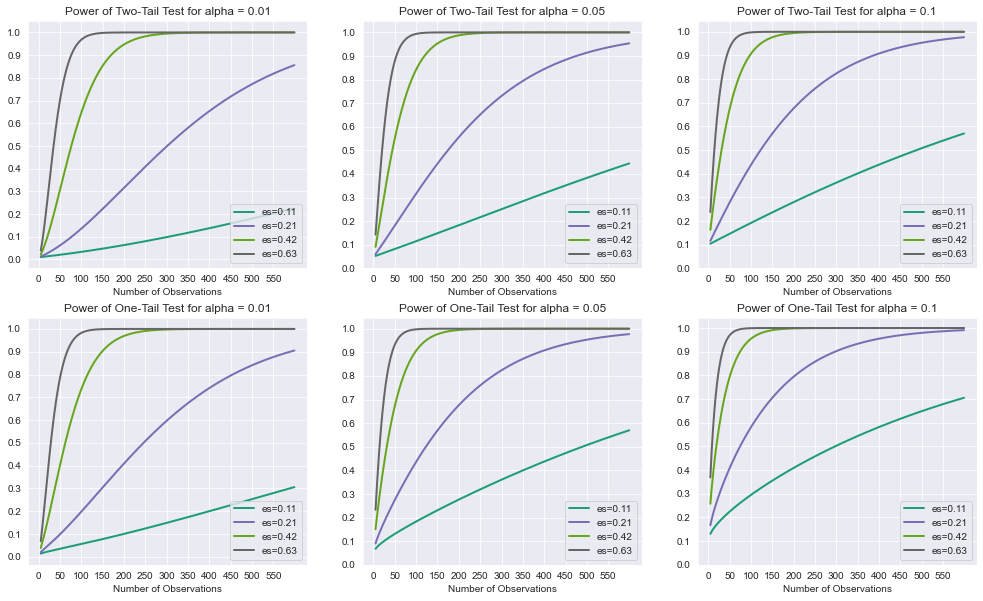

In [33]:
#Plot power curves for the various alpha and effect size combinations
sd = 0.0475
raw_effect_sizes = [0.005, 0.01, 0.02, 0.03]
standardized_eff_sizes = [mean_diff/sd for mean_diff in raw_effect_sizes]

alphas = [0.01, 0.05, 0.1]

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(17,10))

for i, alpha in enumerate(alphas):
    ax = axes[0,i]
    power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,600)),
                          effect_size = np.array(standardized_eff_sizes),
                          alpha = alpha,
                          ax=ax)
    ax.set_title('Power of Two-Tail Test for alpha = {}'.format(alpha))
    ax.set_xticks(list(range(0,600,50)))
    ax.set_yticks(np.linspace(0,1,11))
    
for i, alpha in enumerate(alphas):
    ax = axes[1,i]
    power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,600)),
                          effect_size = np.array(standardized_eff_sizes),
                          alpha = alpha,
                          ax=ax,
                          alternative='larger')
    
    ax.set_title('Power of One-Tail Test for alpha = {}'.format(alpha))
    ax.set_xticks(list(range(0,600,50)))
    ax.set_yticks(np.linspace(0,1,11))


## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [ ]:
# We can't simply assume that the new template performs better, we definitely also want to check that it
# actually performs worse than the one already in use, so need to base experimental design off of needs for
# two-tail test rather than one-tail test. Set alpha at conventional 0.05. This points us towards using
# the top middle graph for experimental design. Larger (raw) effect sizes such as 0.02 and 0.03 change in 
# response rate can be detected with acceptable statistical power of ~ 0.8 with sample sizes <100, but 
# not so for our expected rate of change of 0.01. Such an effect size is only detectable with power = 0.8
# with sample size of approx 350. I recommend a sample size of at least 200 testers which will give us at least
# a 50% chance of detecting all but the smallest effect sizes. A sample size closer to 350 would be ideal.
# If we're reasonably confident the new template will perform better and not worse, this larger sample size 
# is not a huge risk, but we should still conduct a two-tail test to be certain.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.